# Model optimization


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Factorial design (Grid search) 

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
X = dataset.data
Y = dataset.target

X = (X-X.mean())/X.std()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, stratify=Y)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

res = []

for d in range(1, X.shape[1]+1):
    for k in range(1, 15, 2):
        X_train_pca = PCA(n_components=d).fit_transform(X_train)
        knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_pca, Y_train)

        X_test_pca = PCA(n_components=d).fit_transform(X_test)
        acc = knn.score(X_test_pca, Y_test)
        res.append([d, k, acc])

<AxesSubplot: xlabel='d', ylabel='k'>

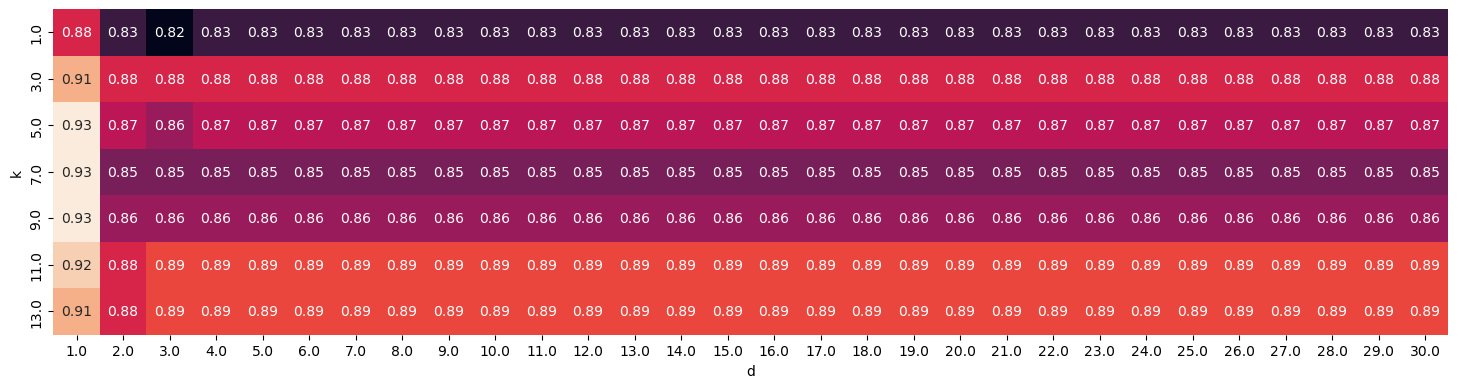

In [ ]:
res_df = pd.DataFrame(np.array(res), columns=['d', 'k', 'acc'])

res_df_pivot = res_df.pivot(index='k', columns='d', values='acc')

fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(ax=ax, data=res_df_pivot, cbar=False, annot=True, square=True, fmt=".2f")

## Compare two classifiers

In [ ]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X = dataset.data
Y = dataset.target

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import ttest_rel
from sklearn.model_selection import train_test_split

p_values = []

for _ in range(100):
    acc_lr = []
    acc_dt = []

    for _ in range(10):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, stratify=Y)
        lr = LogisticRegression(solver='liblinear').fit(X_train, Y_train)
        dt = DecisionTreeClassifier().fit(X_train, Y_train)

        acc_lr.append(lr.score(X_test, Y_test))
        acc_dt.append(dt.score(X_test, Y_test))

    acc_dt = np.array(acc_dt)
    acc_lr = np.array(acc_lr)

    p_values.append(ttest_rel(acc_dt, acc_lr).pvalue)


power=0.82


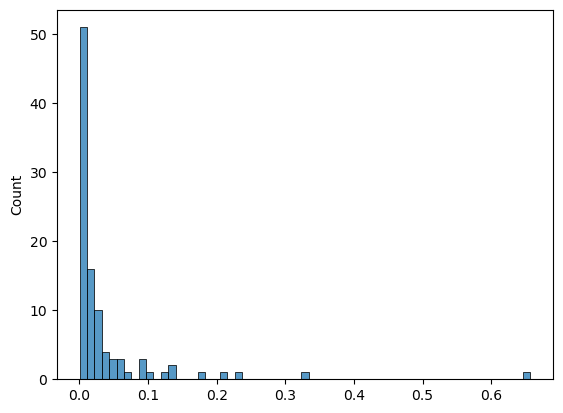

In [ ]:
p_values = np.array(p_values)

sns.histplot(p_values)
power = np.sum(p_values < 0.05)/p_values.shape[0]
print(f"{power=}")

In [5]:
from sklearn.datasets import load_breast_cancer

df_bc = load_breast_cancer(as_frame=True).frame
df_bc

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [6]:
from sklearn.model_selection import train_test_split

X = df_bc.iloc[:, :-1]
y = df_bc.iloc[:, -1]


((455, 30), (114, 30), (455,), (114,))

## Basic hypothesis test two-sided

<AxesSubplot: ylabel='Count'>

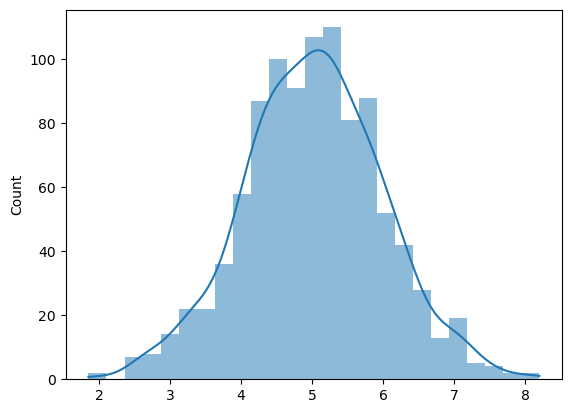

In [ ]:
mu = 5
var = 1
N = 1000
sample = np.random.normal(mu, var, size=N)
sns.histplot(data=sample, kde=True, ec=None)

$H_0: \mu = \mu_0$

$H_1: \mu \neq \mu_0$

$
    \text{If}\quad \frac{\sqrt{N} (m - \mu_0)}{\sigma} \in (-1.96, 1.96) \quad\text{ then with 95\% confidence, we fail to reject } H_0
$

In [ ]:
mu0 = 8
z_stat = N**.5 * (sample.mean() - mu0) / var**.5
print(f"with {mu0=}")
print(f"{z_stat=}")
print(f"falls within 95% interval (-1.96, 1.96)? {'yes, fail to reject H0' if -1.96 < z_stat < 1.96 else 'no, reject H0'}")

print()

mu0 = 5
z_stat = N**.5 * (sample.mean() - mu0) / var**.5
print(f"with {mu0=}")
print(f"{z_stat=}")
print(f"falls within 95% interval (-1.96, 1.96)? {'yes, fail to reject H0' if -1.96 < z_stat < 1.96 else 'no, reject H0'}")


with mu0=8
z_stat=-94.26010041350676
falls within 95% interval (-1.96, 1.96)? no, reject H0

with mu0=5
z_stat=0.6082293915446151
falls within 95% interval (-1.96, 1.96)? yes, fail to reject H0


## t Test

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

dataset = load_breast_cancer()
X = dataset.data
Y = dataset.target

p_hats = []
K = 30
replications = range(0, K)

for _ in replications:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, stratify=Y)

    lr = LogisticRegression(solver='liblinear').fit(X_train, Y_train)
    N = Y_test.shape[0]
    p_hat = np.sum(lr.predict(X_test) != Y_test)/N
    p_hats.append(p_hat)

p_hats = np.array(p_hats)

m = p_hats.mean()
S2 = np.sum((p_hats - m)**2)/(K-1)
m, S2

(0.045614035087719294, 0.00029929633521189535)

0.04040404040404041

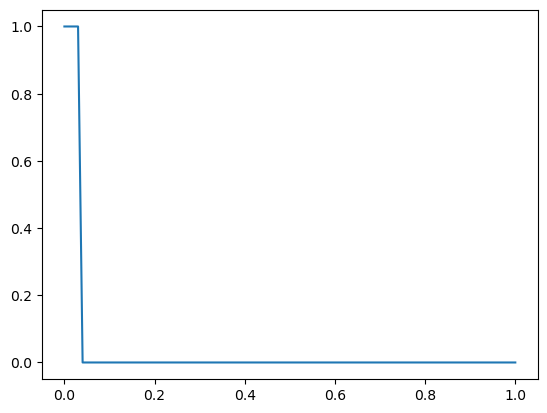

In [ ]:
p0 = np.linspace(0, 1, 100)

t_stat = np.sqrt(K) * (m-p0) / np.sqrt(S2)
sns.lineplot(x=p0, y=t_stat>1.7)
p0_bound_index = np.argmax(t_stat<=1.7)
p0_bound = p0[p0_bound_index]
p0_bound

## K-fold CV paired t-test

- $H_0: \mu = 0, \qquad H_1: \mu \neq 0$, 
- where $\mu$ is the mean of the difference between the error rates $p_i^1, p_i^2$,
- difference: $p_i = p_i^1 - p_i^2$
- point estimate mean of differences: $m = \sum_i p_i / K$ 

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

dataset = load_breast_cancer()
X = dataset.data
Y = dataset.target

p_i = []

K = 10
kf = KFold(n_splits=K)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    lr = LogisticRegression(solver='liblinear').fit(X_train, Y_train)
    dt = DecisionTreeClassifier(max_depth=1).fit(X_train, Y_train)

    p_i.append((1-lr.score(X_test, Y_test)) - (1-dt.score(X_test, Y_test)))

p_i = np.array(p_i)

In [ ]:
m = p_i.mean()

S_2 = np.sum((p_i - m)**2)/(K-1)

t_stat = (K**.5 * m)/S_2**.5
t_stat

-5.559968100722705

Reject if $t \not\in (-2.26, 2.26)$ for $K=10$

## Cross validation 